In [1]:
#!pip install tensorflow

In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 64
EPOCHS = 25
NUM_CLASSES = 10
SEED = 42
VALIDATION_SPLIT = 0.2

In [4]:
# Чтение и запись в датафрейм датасета для обучения
train_df = pd.read_csv('../input/mds-mipt-dl-test-final/fmnist_train.csv')

In [5]:
# Описательная статистика для датайфрема для обучения
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
count,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,17040.000000,...,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17039.000000,17040.000000
mean,4.486913,0.002347,0.005869,0.028991,0.114495,0.233275,0.372946,0.725352,2.167077,5.751995,...,23.532308,16.799519,17.331886,22.342332,17.985328,8.849111,2.964435,0.961265,0.088738,8519.500000
std,2.881984,0.172991,0.209439,0.621885,2.630319,4.060619,5.337305,7.395038,13.906113,24.238699,...,48.730232,41.825340,43.064804,51.111173,45.379001,30.228846,18.003959,9.866697,2.342414,4919.168629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4259.750000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8519.500000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12779.250000
max,9.000000,16.000000,16.000000,56.000000,164.000000,217.000000,230.000000,213.000000,218.000000,254.000000,...,255.000000,254.000000,255.000000,252.000000,255.000000,250.000000,255.000000,255.000000,170.000000,17039.000000


In [6]:
# Общая информация о датафрейме для обучения
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB


In [7]:
# Просмотр первых пяти строк датасета для обучения
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
# Чтение и запись в датафрейм датасета для теста
test_df = pd.read_csv('../input/mds-mipt-dl-test-final/fmnist_test.csv')

In [9]:
# Просмотр первых пяти строк датасета для теста
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [10]:
# Проверка на NaN значения датафрейма для обучения.
train_df.isnull().sum().sum()

424

In [11]:
# Проверка на NaN значения датафрейма для обучения.
train_df.isna().sum().sum()

424

In [12]:
# Проверка на NaN значения датафрейма для теста.
test_df.isna().sum().sum()

0

In [13]:
# Строка, где есть NaN значения
train_df[train_df.isna().any(axis=1)]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
17039,5,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17039


In [14]:
# Удаление строки, где есть NaN значения
train_df.dropna(how='any', inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17039 entries, 0 to 17038
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.3 MB


In [15]:
# Создание словаря с метками и названия одежды/обуви.
labels = {
          0: 'T-shirt',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'
          }

In [16]:
# Функция построения частотного распределения по классам.
def plot_label_per_class(data):
    g = sns.countplot(data=data, x='label')
    g.set_title('Кол-во меток каждого класса')

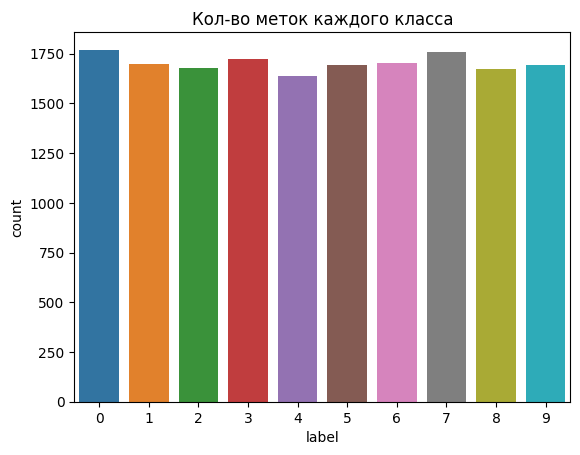

In [17]:
# Частнотное распределение по классам для датафрейма для обучения. Сбалансированность классов
plot_label_per_class(train_df)

In [18]:
# Разделение на обучающую и валидационную выборки
train_files, val_files, train_labels, val_labels = train_test_split(\
                                                                   train_df.iloc[:, 1:-1], train_df['label'], \
                                                                   test_size=VALIDATION_SPLIT, random_state=SEED, \
                                                                   stratify=train_df['label'])

In [19]:
# Преобразование обучающей выборки для подачи в модель.  1 - количество каналов изображения (черно-белое изображение)
train_df_copy = np.reshape(train_files.values, (train_files.shape[0], IMG_WIDTH, IMG_HEIGHT, 1))
train_df_copy.shape

(13631, 28, 28, 1)

In [20]:
# Создание копии обучающей выборки
train_files_copy = train_files

In [21]:
# Добавление классов для построения графика
train_files_copy['label'] = train_labels
train_files_copy['label']

11602    4
16071    8
10905    6
9949     5
12702    3
        ..
4227     2
406      2
8577     3
16990    3
16537    6
Name: label, Length: 13631, dtype: int64

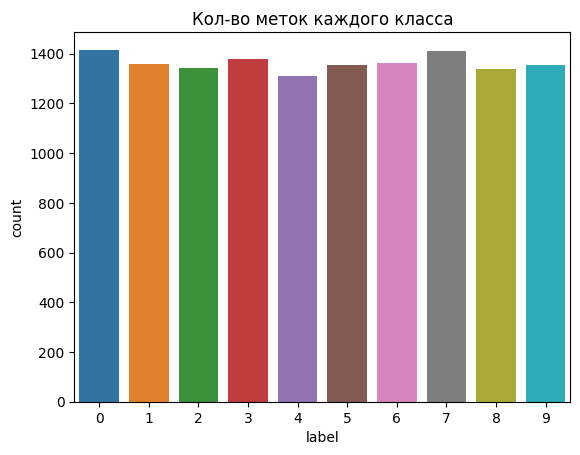

In [22]:
# Проверка сбаласированности классов в обучающей выборке
plot_label_per_class(train_files_copy)

In [23]:
# Преобразование тестовой выборки для подачи в модель.  1 - количество каналов изображения (черно-белое изображение)
test_df_copy = np.reshape(test_df.iloc[:, :-1].values, (test_df.shape[0], IMG_WIDTH, IMG_HEIGHT, 1))
test_df_copy.shape

(10000, 28, 28, 1)

In [24]:
# Преобразование валидационной выборки для подачи в модель.  1 - количество каналов изображения (черно-белое изображение)
val_df_copy = np.reshape(val_files.values, (val_files.shape[0], IMG_WIDTH, IMG_HEIGHT, 1))
val_df_copy.shape

(3408, 28, 28, 1)

In [25]:
# Функция случайного отображения картинок с одеждой/обувью и метками
def plot_img_label(y, X):
    if type(y) != np.ndarray:
        y = y.values.reshape(-1, 1)
    else:
        y = y.reshape(-1, 1)
    cols = 8
    rows = 2
    fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(y))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.grid('off')
            ax.axis('off')
            ax.imshow(X[random_index, :])
            ax.set_title(labels[y[random_index, 0]])
    plt.show()

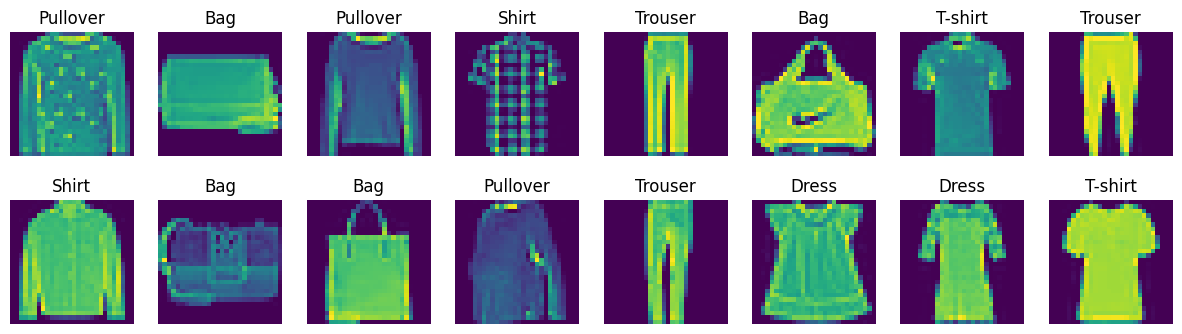

In [26]:
# Отображение картинок с метками в обучающей выборке
plot_img_label(train_labels, train_df_copy)

In [27]:
# Нормализация данных для подачи в модель
x_train = train_df_copy.astype('float32') / 255
x_val = val_df_copy.astype('float32') / 255

In [28]:
# Преобразование меток one-hot кодированием
y_train = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(val_labels, NUM_CLASSES)
y_val

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [29]:
# Добавление слоев в модель
def make_default_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model

In [30]:
# Очищение сессии, построение модели, выведение слоев, кол-ва параметров и формы выходов
K.clear_session()
model = make_default_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [31]:
# Компиляция модели и обучение
model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
  )
# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
#callbacks = [tf.keras.callbacks.ModelCheckpoint('epoch_{epoch}.h5')]
history = model.fit(
      x_train, y_train,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      validation_data=(x_val, y_val),
      shuffle=False
)

Epoch 1/25
213/213 [==============================] - 37s 161ms/step - loss: 0.7743 - accuracy: 0.7506 - val_loss: 2.2450 - val_accuracy: 0.2192
Epoch 2/25
213/213 [==============================] - 34s 161ms/step - loss: 0.4757 - accuracy: 0.8346 - val_loss: 1.3043 - val_accuracy: 0.5810
Epoch 3/25
213/213 [==============================] - 34s 159ms/step - loss: 0.3736 - accuracy: 0.8690 - val_loss: 0.4040 - val_accuracy: 0.8633
Epoch 4/25
213/213 [==============================] - 34s 161ms/step - loss: 0.3110 - accuracy: 0.8864 - val_loss: 0.3058 - val_accuracy: 0.8900
Epoch 5/25
213/213 [==============================] - 35s 162ms/step - loss: 0.2842 - accuracy: 0.8967 - val_loss: 0.2962 - val_accuracy: 0.8955
Epoch 6/25
213/213 [==============================] - 33s 155ms/step - loss: 0.2579 - accuracy: 0.9054 - val_loss: 0.3116 - val_accuracy: 0.8844
Epoch 7/25
213/213 [==============================] - 33s 157ms/step - loss: 0.2309 - accuracy: 0.9137 - val_loss: 0.3086 - val_ac

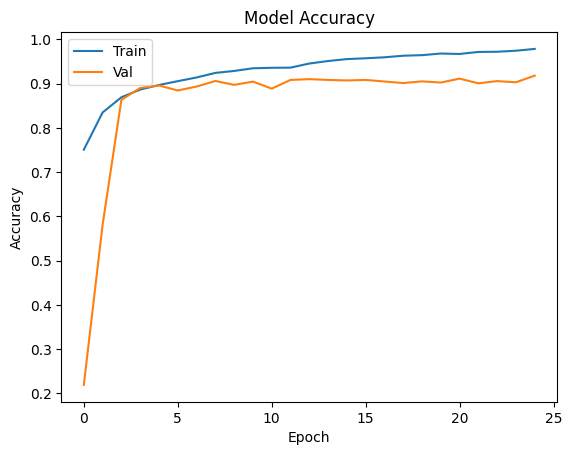

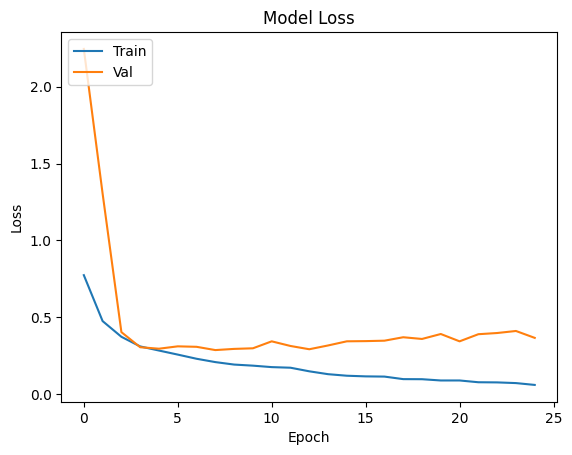

In [32]:
# Построение графиков обучения accuracy, loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [33]:
# Нормализация данных для подачи в модель
x_test = test_df_copy.astype('float32') / 255

In [34]:
# Получение прогнозов модели на тестовой выборке
predictions = model.predict(x_test)

313/313 [==============================] - 7s 21ms/step


In [35]:
# Выбор класса с наибольшей вероятностью в каждой строке
y_pred = predictions.argmax(axis=1)

In [36]:
# Создание датафрейма с колонкой Id
df = pd.DataFrame({'Id': test_df['Id']})

In [37]:
# Добавление к датафрейму колонки с прогнозами
df['Category'] = y_pred

In [38]:
# Сохранение датафрейм в csv файл
df.to_csv('submission.csv', index=False)

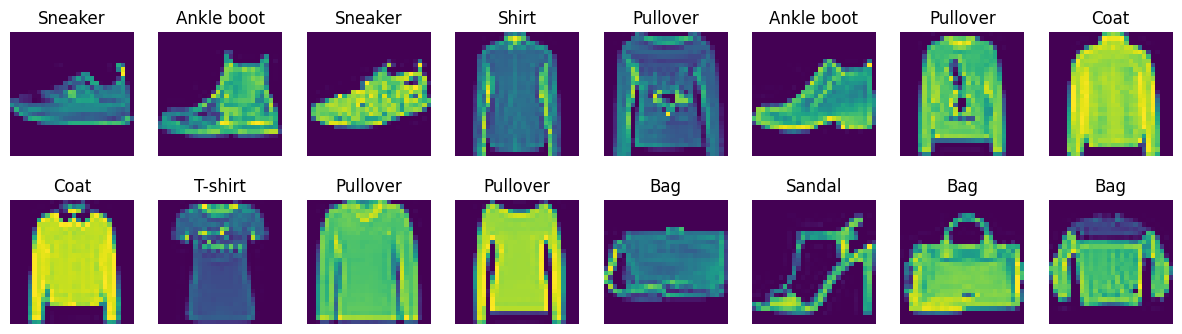

In [39]:
# Отображение картинок из тестовой выборки с предсказанными метками
plot_img_label(y_pred, test_df_copy)